In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


## Load Data 

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 232s 1us/step


In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


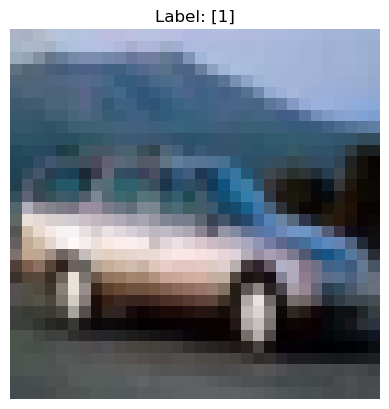

In [10]:
plt.imshow(X_train[4])
plt.title(f"Label: {y_train[4]}")
plt.axis('off')
plt.show()

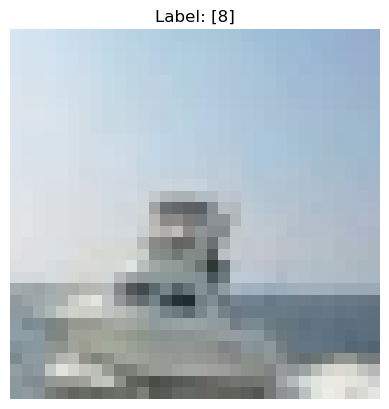

In [12]:
plt.imshow(X_train[100], cmap = 'gray')
plt.title(f"Label: {y_train[100]}")
plt.axis('off')
plt.show()

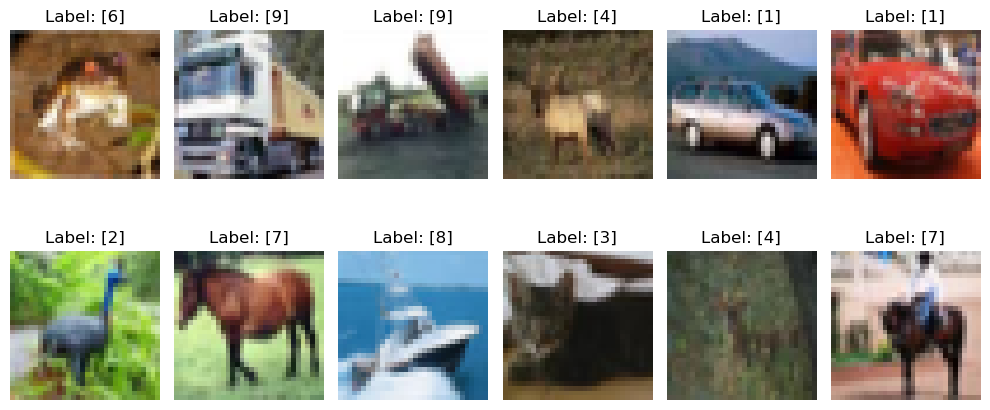

In [13]:
plt.figure(figsize = (10, 5))
for i in range(12):
    plt.subplot(2, 6, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Normalize pixel values to the range [0, 1]

In [14]:
X_train, X_test = X_train / 255.0, X_test / 255.0

## Convert labels to one-dimensional arrays

In [16]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [17]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [18]:
y_train.shape

(50000,)

## Create The Model

In [32]:
cnn_model = models.Sequential()

## First Convolutional BLock

In [33]:
# First Convolutional Layer with padding
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))

## Second Convolutional Block

In [34]:
# Second Convolutional Layer with padding
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))

## Third Convolutional Block 

In [35]:
# Third Convolutional Layer with padding
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))

## Fully Connected Layers

In [36]:
# Flatten the tensor
cnn_model.add(layers.Flatten())

# Fully connected layer
cnn_model.add(layers.Dense(128, activation='relu'))

# Dropout to prevent overfitting
cnn_model.add(layers.Dropout(0.5))

# Output layer with 10 classes (softmax for multi-class classification)
cnn_model.add(layers.Dense(10, activation='softmax'))

## Print model summary

In [37]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

## Complile The Model

In [38]:
# Compile the model
cnn_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

In [39]:
history = cnn_model.fit(X_train, y_train, 
                        epochs=10, 
                        batch_size=64, 
                        validation_split=0.2, 
                        verbose=2)

Epoch 1/10
625/625 - 34s - 55ms/step - accuracy: 0.3932 - loss: 1.6863 - val_accuracy: 0.5012 - val_loss: 1.4258
Epoch 2/10
625/625 - 35s - 56ms/step - accuracy: 0.5224 - loss: 1.3269 - val_accuracy: 0.5414 - val_loss: 1.2834
Epoch 3/10
625/625 - 34s - 55ms/step - accuracy: 0.5946 - loss: 1.1375 - val_accuracy: 0.6066 - val_loss: 1.1080
Epoch 4/10
625/625 - 34s - 54ms/step - accuracy: 0.6510 - loss: 0.9998 - val_accuracy: 0.6813 - val_loss: 0.9109
Epoch 5/10
625/625 - 35s - 56ms/step - accuracy: 0.6866 - loss: 0.8982 - val_accuracy: 0.7223 - val_loss: 0.8040
Epoch 6/10
625/625 - 34s - 55ms/step - accuracy: 0.7154 - loss: 0.8138 - val_accuracy: 0.6952 - val_loss: 0.8732
Epoch 7/10
625/625 - 34s - 55ms/step - accuracy: 0.7404 - loss: 0.7428 - val_accuracy: 0.7238 - val_loss: 0.8254
Epoch 8/10
625/625 - 35s - 56ms/step - accuracy: 0.7635 - loss: 0.6809 - val_accuracy: 0.7272 - val_loss: 0.8102
Epoch 9/10
625/625 - 36s - 57ms/step - accuracy: 0.7825 - loss: 0.6254 - val_accuracy: 0.7175 - 

## Evaluate on test data

In [40]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose = 2)
print(f"Test Accuracy: {test_accuracy: .2f}")

313/313 - 2s - 7ms/step - accuracy: 0.7162 - loss: 0.8661
Test Accuracy:  0.72


In [42]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


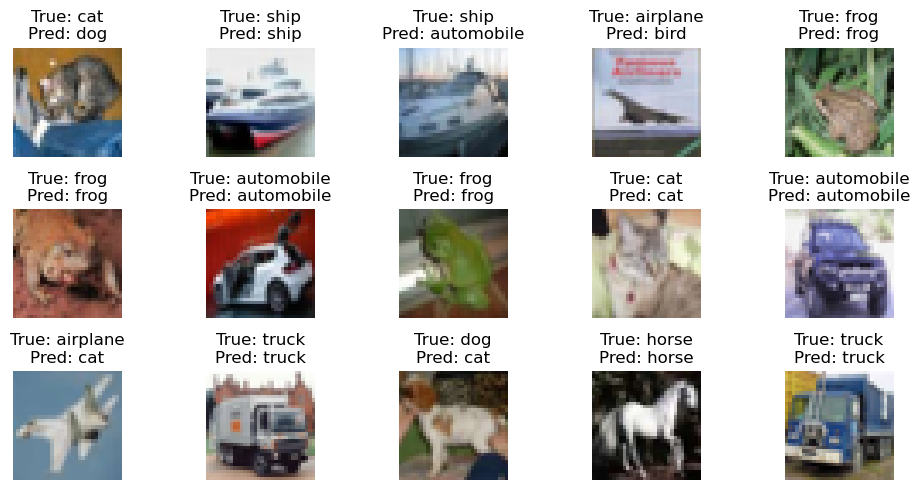

In [43]:
sample_images = X_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(cnn_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Plot accuracy and loss

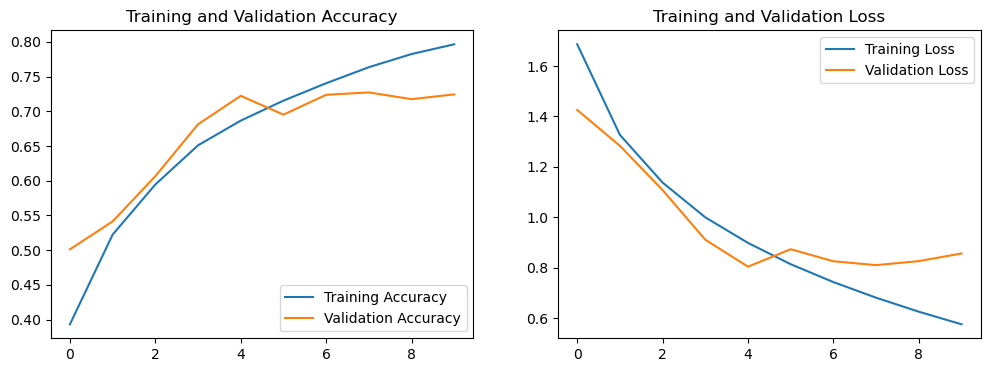

In [45]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


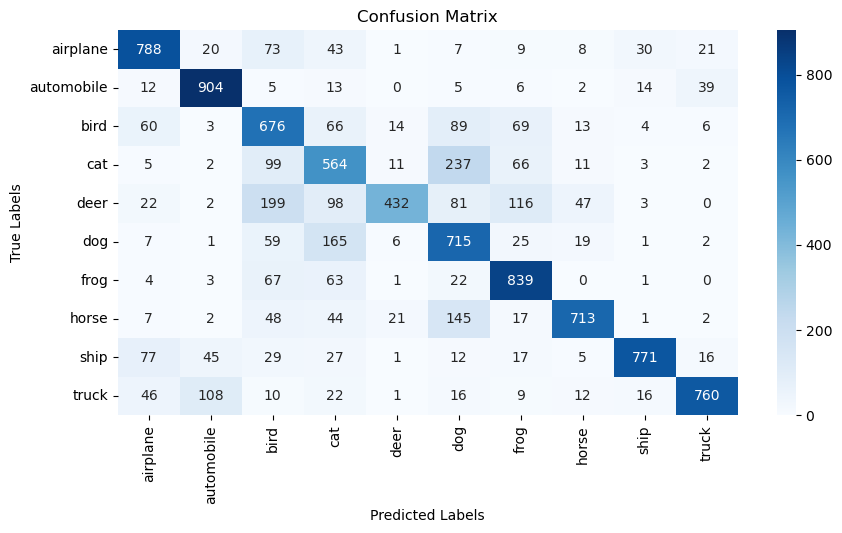

In [46]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Generate a classification report

In [47]:
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.77      0.79      0.78      1000
  automobile       0.83      0.90      0.87      1000
        bird       0.53      0.68      0.60      1000
         cat       0.51      0.56      0.54      1000
        deer       0.89      0.43      0.58      1000
         dog       0.54      0.71      0.61      1000
        frog       0.72      0.84      0.77      1000
       horse       0.86      0.71      0.78      1000
        ship       0.91      0.77      0.84      1000
       truck       0.90      0.76      0.82      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.72     10000
weighted avg       0.74      0.72      0.72     10000



## Save the Model

In [48]:
cnn_model.save('cnn_cifar10_model.h5')
print("Model saved as 'cnn_cifar10_model.h5'")

Model saved as 'cnn_cifar10_model.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


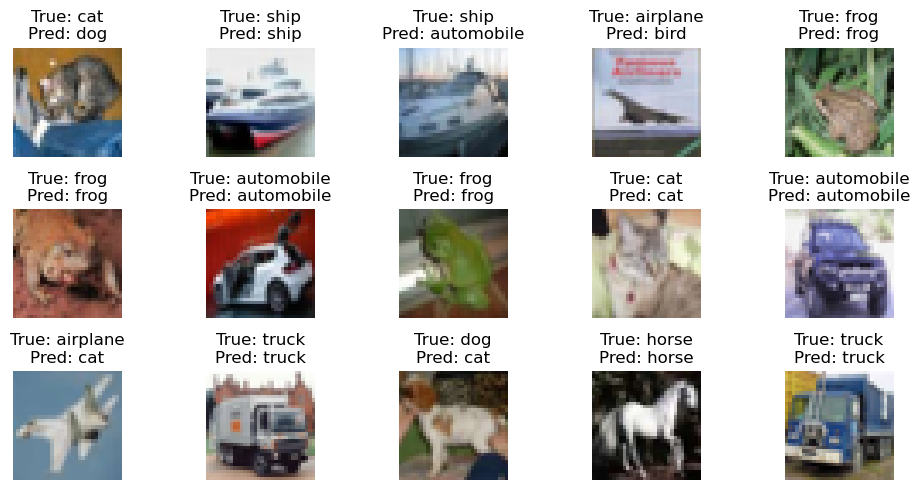

In [49]:
loaded_model = tf.keras.models.load_model('cnn_cifar10_model.h5')

sample_images = X_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(loaded_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()